# **Twitter Data Analysis on IPL Tweets**

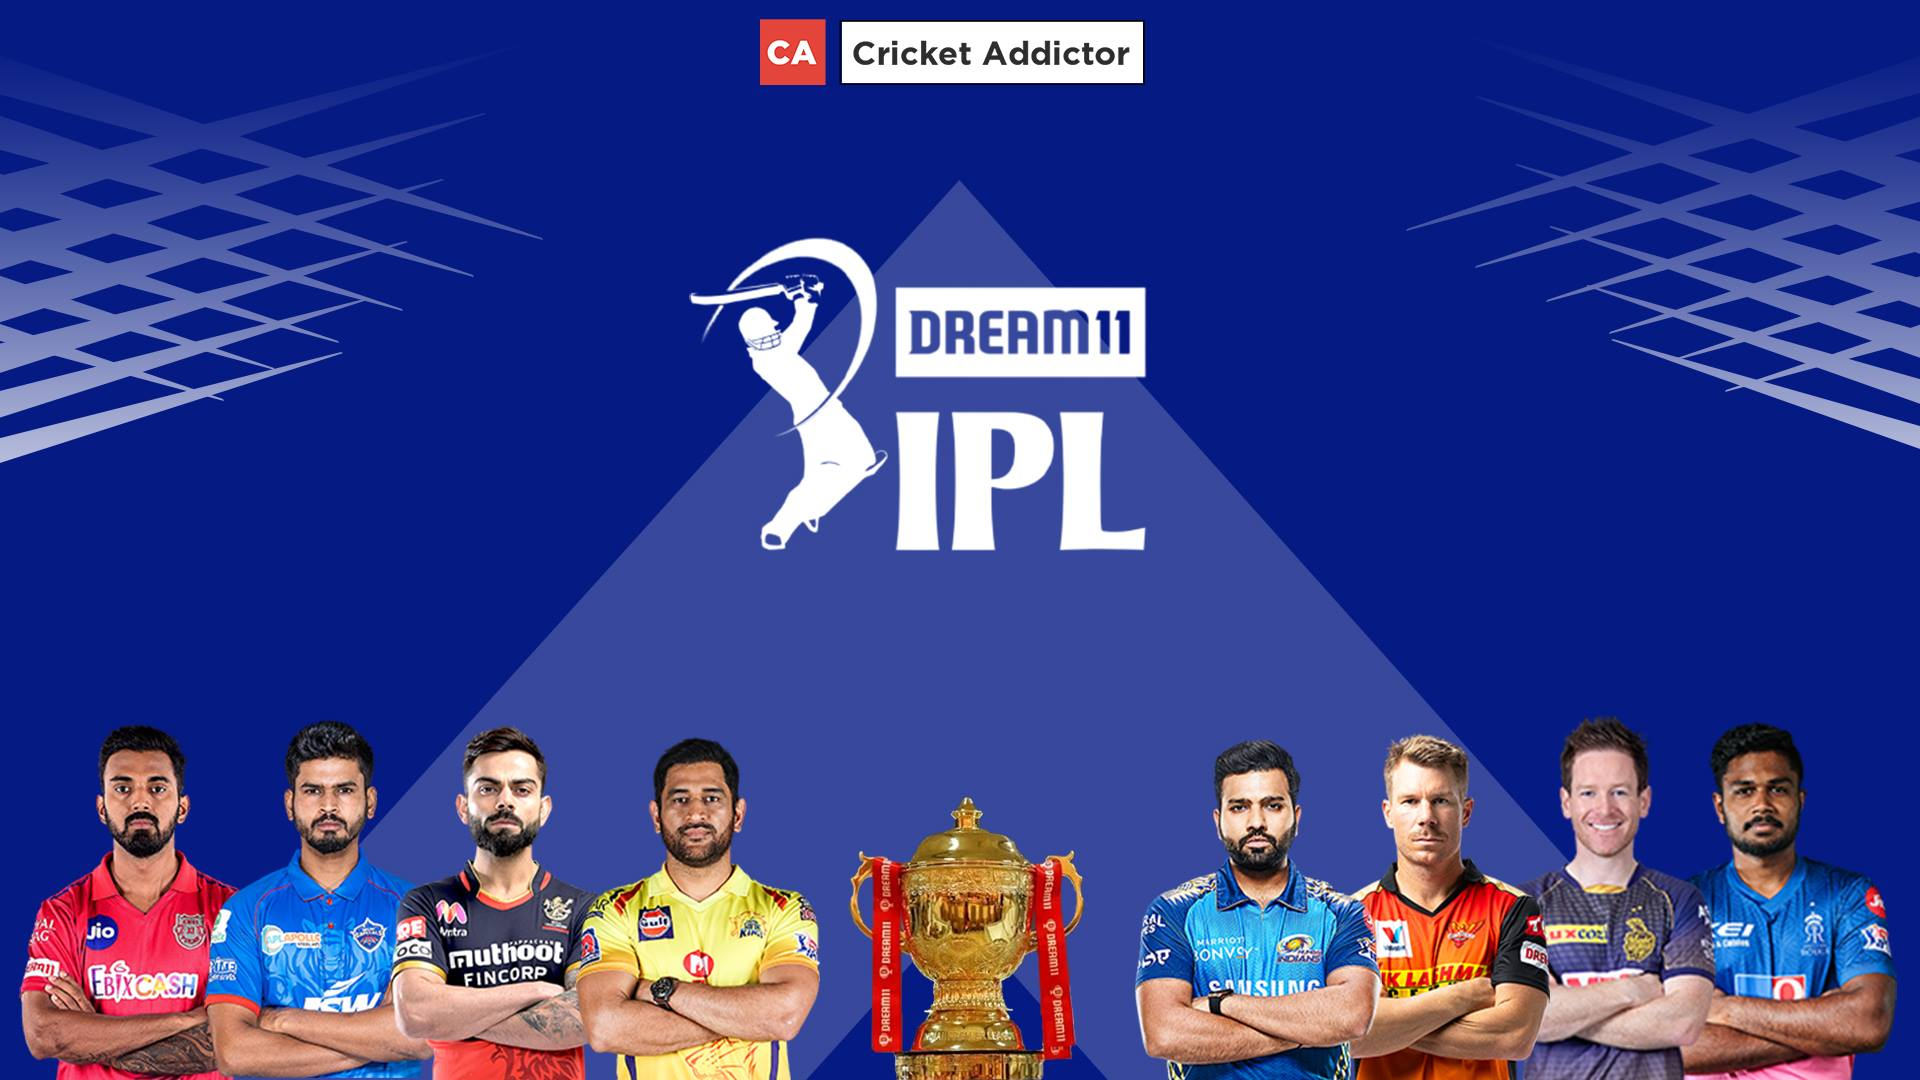

# Determine the IPL Tweet captivating trends depending on the number of tweets **per** day.

In [ ]:
!pip install vaderSentiment
!pip install geopandas
!pip install pycountry_convert
!pip install country_converter
!pip install geopy
!pip install plotly

In [ ]:
import pandas as pd
import plotly.graph_objects as go
ipl=pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')
ipl.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252395 entries, 0 to 252394
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         252388 non-null  object 
 1   user_location     178878 non-null  object 
 2   user_description  221018 non-null  object 
 3   user_created      252393 non-null  object 
 4   user_followers    252393 non-null  float64
 5   user_friends      252393 non-null  object 
 6   user_favourites   252393 non-null  object 
 7   user_verified     252393 non-null  object 
 8   date              252393 non-null  object 
 9   text              252393 non-null  object 
 10  hashtags          231251 non-null  object 
 11  source            252323 non-null  object 
 12  is_retweet        252389 non-null  object 
dtypes: float64(1), object(12)
memory usage: 25.0+ MB


**Total IPL tweets In year 2021**

In [ ]:
ipl['date'] = pd.to_datetime(ipl['date'],infer_datetime_format=True,errors ='coerce') 
ipl['tweet_date']=ipl['date'].dt.date
tweet_date=ipl['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'],infer_datetime_format=True,errors ='coerce')
tweet_date=tweet_date.sort_values('date',ascending=True)
tweet_date

,date,count
6,2021-02-18,15813
15,2021-02-19,3147
25,2021-02-20,729
28,2021-02-21,659
34,2021-02-22,549
...,...,...
26,2021-10-03,694
11,2021-10-04,5849
37,2021-11-03,423
1,2021-11-04,22191


In [ ]:
fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(tweet_date['date'].sort_values().iloc[0].strftime("%d/%m/%Y"),
                                                       tweet_date['date'].sort_values().iloc[-1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

**Final Outcome**

From the graph below, we can see that the IPL trend tweets started picking up in early Feb as the IPL players auction happened where each player was auctioned to separate teams from where they will be playing for that teams in that year. As the days went by the IPL fever was nominal as the tweets were in the range of few hundreds then on the April 19, 2021, the tournament started and we can see that the there is a very high spike in the data. Then as the days went the covid cases started increasing in India which as a result dropped the significant number of tweets related to IPL as well and on May4 the BCCI stopped the Tournament which gave a small spike as many were flocked to twitter on the announcement. Later, we can see that on August4 the IPL treading tweet was back as the BCCI announced it will continue the Tournament in UAE from Sept 4. As we can see the IPL Fever was back to public and the Tournament progressed till Nov4 which was the Final match. 

# **Determine the IPL Popularity across countries**

In [ ]:
import geopandas
import pandas as pd
import numpy as np 
import json
import plotly.express as px
from geopy.geocoders import Nominatim

In [ ]:
stats=pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="IPL Tweets")

In [ ]:
df = stats['user_location'].value_counts().reset_index()
df.columns = ['user_location', 'count']
df = df[df['user_location'] != 'NaN']
df

,user_location,count
0,India,24761
1,"Mumbai, India",12106
2,"New Delhi, India",7796
3,"Hyderabad, India",4281
4,"Bengaluru, India",3804
...,...,...
11191,"Mumbai,INDIA &Narayanpur,Assam",1
11192,ಕನ್ನಡಿಗ,1
11193,Vallbhipur,1
11194,alappuzha kerala india,1


In [ ]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import country_converter as coco
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        return
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

new_df = df
new_df['user_location'] = coco.convert(names=new_df['user_location'], to='name_short')
new_df = new_df['user_location'].value_counts().to_frame().reset_index().rename(columns={'index':'location','user_location':'count'})
new_df = new_df[new_df['location'] != 'not found']
new_df

Streaming output truncated to the last 5000 lines.
Kaliyaganj, West Bengal not found in regex
Nagpur/New Delhi not found in regex
Parsa-majhaulia, Bihar / Delhi not found in regex
Kepler-452b not found in regex
Punekar not found in regex
Bengaluru (Sirsi) not found in regex
Dallas , Texas not found in regex
West Sussex, England not found in regex
Columbia, SC not found in regex
West London  not found in regex
In a shed not found in regex
HINDUstan 🇮🇳 not found in regex
Majha Block x 🌏 not found in regex
Vasai (W), Palghar not found in regex
Kerala 🚣 Gods own country 🌴  not found in regex
गड़चिरोली, महाराष्ट्र not found in regex
close to God not found in regex
udupi not found in regex
தளபதி மனதில் 💞 Villupuram  not found in regex
RTC Cross Roads, Hyderabad not found in regex
MSP not found in ISO3
samundar kinare not found in regex
गलत जगह not found in regex
Himalaya not found in regex
lingampally not found in regex
Curchorem, Goa | Bangalore not found in regex
5 Hanspukur lane kolkata 7

,location,count
1,India,2476
2,Pakistan,129
3,Nepal,68
4,Bangladesh,53
5,Sri Lanka,52
...,...,...
136,"[Hong Kong, Singapore]",1
137,Israel,1
138,Malta,1
139,Laos,1


In [ ]:
new_df['codes'] = new_df['location'].apply(lambda x: get_continent(x))

new_df

,location,count,codes
1,India,2476,"(IN, AS)"
2,Pakistan,129,"(PK, AS)"
3,Nepal,68,"(NP, AS)"
4,Bangladesh,53,"(BD, AS)"
5,Sri Lanka,52,"(LK, AS)"
...,...,...,...
136,"[Hong Kong, Singapore]",1,None
137,Israel,1,"(IL, AS)"
138,Malta,1,"(MT, EU)"
139,Laos,1,"(LA, AS)"


In [ ]:
#function to get longitude and latitude data from country name
geolocator = Nominatim(user_agent="example app")
def geolocateLon(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

def geolocateLat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan

new_df['lat'] = new_df['location'].apply(lambda x: geolocateLat(x))
new_df['lon'] = new_df['location'].apply(lambda x: geolocateLon(x))
new_df

,location,count,codes,lat,lon
1,India,2476,"(IN, AS)",22.351115,78.667743
2,Pakistan,129,"(PK, AS)",30.330840,71.247499
3,Nepal,68,"(NP, AS)",28.108393,84.091714
4,Bangladesh,53,"(BD, AS)",24.476929,90.293441
5,Sri Lanka,52,"(LK, AS)",7.555494,80.713785
...,...,...,...,...,...
136,"[Hong Kong, Singapore]",1,None,NaN,103.847672
137,Israel,1,"(IL, AS)",31.531311,34.866765
138,Malta,1,"(MT, EU)",35.888599,14.447691
139,Laos,1,"(LA, AS)",20.017111,103.378253


In [ ]:
new = new_df.loc[new_df['location'].apply(lambda x: type(x) != list)]
new

,location,count,codes,lat,lon
1,India,2476,"(IN, AS)",22.351115,78.667743
2,Pakistan,129,"(PK, AS)",30.330840,71.247499
3,Nepal,68,"(NP, AS)",28.108393,84.091714
4,Bangladesh,53,"(BD, AS)",24.476929,90.293441
5,Sri Lanka,52,"(LK, AS)",7.555494,80.713785
...,...,...,...,...,...
135,Venezuela,1,"(VE, SA)",8.001871,-66.110932
137,Israel,1,"(IL, AS)",31.531311,34.866765
138,Malta,1,"(MT, EU)",35.888599,14.447691
139,Laos,1,"(LA, AS)",20.017111,103.378253


In [ ]:
from urllib.request import urlopen
with urlopen('https://datahub.io/core/geo-countries/datapackage.json') as response:
  countries = json.load(response)

fig = px.choropleth(
    new,
    geojson = countries,
    color_continuous_scale="Viridis",
    locationmode = 'country names',
    locations = 'location',
    color="count",
    scope="world",
    labels={'count': 'IPL popularity across countries by tweet count'}
)
fig.update_layout(margin={"r": 0, "t": 0,"l":0, "b": 0})
fig.show()

**Final Outcome**

As expected from the data, most of the tweets are originating from India and the Indian subcontinent. This is because cricket is almost a religion in these countries and hence people follow every match closely. Also, majority of the players playing in the Indian Premier league originate from these countries. The Indian diaspora is widespread throughout the world especially in North America. This can explain the tweets originating from Canada and the United States. Some tweets are also originating from Russia and south American countries. This is surprising as historically these countries have never played cricket before. This might indicate a rising interest in the sport in these countries. The middle east countries of Saudi Arabia and its neighbors often host cricket matches. In fact, Saudi Arabia was the venue of the IPL when India had its elections in 2009 and IPL could not be hosted in India. Also, Saudi Arabia was the venue where IPL was hosted after the tournament was affected by rising cases due to the coronavirus pandemic. Hence, we can see tweets originating from Saudi Arabia, Oman, Yemen, and Egypt.

In the African subcontinent, countries like South Africa, Zimbabwe, Kenya have been traditional powerhouses of the sport. In these countries the sport was introduced by the European colonists. These countries also have their own variation of the IPL tournament. Hence, we can see some interest in the IPL in these countries as well. However, countries like Bostwana, Chad, Nigeria, Cameroon, Ghana, Morocco, Tanzania, DR Congo and Zambia are also found to be taking an interest in the tournament. These countries might also be influenced by their African neighbors and take an interest in the sport. 

# **IPL popularity across Indian States**





In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.express as px

In [ ]:
def getRawLoc(data):
  try: 
    location = geolocator.geocode(data, addressdetails=True)
  except:
    return
  if str(type(location)) == '<class \'geopy.location.Location\'>':
    if 'address' in location.raw and 'country' in location.raw['address'] and location.raw['address']['country'] == 'India':
      if 'state' in location.raw['address']:
        return location.raw['address']['state']
  return

state_df = pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')
state_df = state_df['user_location'].value_counts().reset_index()
state_df['state_location'] = state_df['index'].apply(getRawLoc)
state_df = state_df.groupby('state_location').sum('user_location').reset_index().rename(columns={'user_location':'count'})
state_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



,state_location,count
0,Andhra Pradesh,2623
1,Arunachal Pradesh,2
2,Assam,801
3,Bihar,1776
4,Chandigarh,949
5,Chhattisgarh,305
6,Dadra and Nagar Haveli and Daman and Diu,10
7,Delhi,14281
8,Goa,268
9,Gujarat,6925


In [ ]:
fig = px.choropleth(
    state_df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_location',
    color='count',
    color_continuous_scale='blues'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title=dict(
        text="IPL popularity across Indian States"
    )
)

fig.show()

**Final Outcome**


From the geographic data snippet attached below, we can see that Maharashtra is the most active crowd in IPL, this also resemblance that the team has won 5 times IPL trophy which would have resulted in higher fan base. Also, one of the strange things we observed where the crowd in Karnataka are more interested in game than people in Tamil Nadu. But the team that is representing Karnataka has not yet won any IPL trophy compared to the team of Tamil Nadu which has won 4 times.

Also, we can see that the interest of the game in the eastern region(7 sisters states of India) of India is not that popular. This might be because there is no IPL team that represents them. So looking forward IPL can move some of the matches there or introduce a team from that region which can result significant increase in popularity towards the game. 


# **Popularity of teams in the year 2021**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
ipltweetdata = pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')
tweets = ipltweetdata.text.apply(str)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
def remove_hash(txt):
    return " ".join(re.sub("#","", txt).split())

In [ ]:
def remove_mentions(txt):
    return " ".join(re.sub("@","", txt).split())

In [ ]:
tweets_no_urls = [remove_url(tweet) for tweet in tweets]
tweets_no_hash = [remove_hash(tweet) for tweet in tweets_no_urls]
tweets_no_mentions = [remove_hash(tweet) for tweet in tweets_no_hash]
tweets_lowercase = [tweet.lower() for tweet in tweets_no_mentions]

In [ ]:
vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,3), min_df=20, stop_words='english')
vecs = vectorizer.fit_transform(tweets_lowercase)
feat_dict=vectorizer.vocabulary_

In [ ]:
teams = ["chennai super kings", "csk",
"royal challengers bangalore", "rcb",
"delhi capital", "dc",
"mumbai indians", "mi",
"kolkata knight riders", "kkr",
"rajasthan royals", "rr",
"kings xi punjab", "kxip",
"sunrisers hyderabad", "srh"]

In [ ]:
team_vocab = []
for team in teams:
    team_vocab.append((team,feat_dict.get(team)))

In [ ]:
team_dict = dict()
for i in range(0, len(team_vocab), 2):
    team_dict[team_vocab[i][0]] = int(team_vocab[i][1] or 0) + int(team_vocab[i+1][1] or 0)

In [ ]:
teamtable = pd.DataFrame.from_dict(team_dict, orient='index')

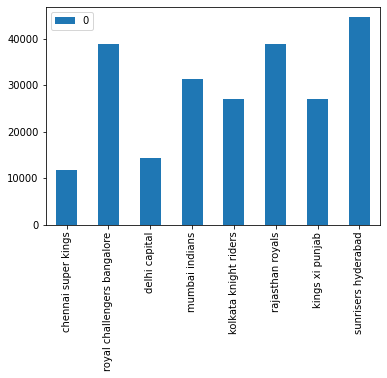

In [ ]:
teamplot = teamtable.plot.bar(rot=90)
teamplot

**Final Outcome**

From the above graph, we can see that the team Sunrisers Hyderabad has the maximum number of mentions in the tweets. The IPL organizers can use this data in the next season to determine marketing strategies and budgets. The team owners themselves can use this data to make changes to their marketing approaches.  

# Overall User sentiment analysis

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')
df.info()
#Creating a copy of text so that we can make changes and perform sentiment analysis
df['senttext'] = df['text']
#cleaning data
df = df.apply(lambda x: x.astype(str).str.lower())
stop_words = stopwords.words('english')
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.text = df.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))
df.text = df.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", x).split()))
df.text = df.text.apply(lambda x: ' '.join(re.sub(r'http\S+', '', x).split()))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252395 entries, 0 to 252394
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         252388 non-null  object 
 1   user_location     178878 non-null  object 
 2   user_description  221018 non-null  object 
 3   user_created      252393 non-null  object 
 4   user_followers    252393 non-null  float64
 5   user_friends      252393 non-null  object 
 6   user_favourites   252393 non-null  object 
 7   user_verified     252393 non-null  object 
 8   date              252393 non-null  object 
 9   text              252393 non-null  object 
 10  hashtags          231251 non-null  object 
 11  source            252323 non-null  object 
 12  is_retweet        252389 non-null  object 
dtypes: float64(1), object(12)
memory usage: 25.0+ MB


In [ ]:
analyser = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['senttext'].apply(lambda x: analyser.polarity_scores(str(x)))

def sentiment_func(sentiment):
    for k,v in sentiment.items():
            if (sentiment['compound'] >= 0.5 ) == True:
                return 'positive'
            elif (sentiment['compound'] == 0.0) == True:
                return 'neutral'
            else:
                return 'negative'

df['sentiment'] = df['sentiment_score'].apply(sentiment_func)

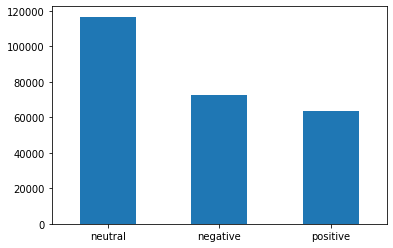

In [ ]:
df.sentiment.value_counts().plot(kind='bar', rot=0)

**Final Outcome**

The bar graph plotted above shows us the sentiments of user tweets. Following are the insights:

1.	We can see that nearly 50% of the tweets are neutral, the reason behind this could be that many tweets contain just the score updates and hence neutral. 

2.	Negative tweets are more than positive tweets by around 20,000 tweets. There could be two main reasons behind this: 

  a)	Some of the high expected players were not performing up to their potential.

  b)	The COVID-19 cases were increasing drastically in India and the government was not stopping the IPL and gave more preference to it, which made users agitated and tweet negative about IPL in general and not teams. 


# **Sentiment analysis per team**

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')
tweets = df.text.apply(str)
df = df.apply(lambda x: x.astype(str).str.lower())
stop_words = stopwords.words('english')
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.text = df.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))
df.text = df.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", x).split()))
df.text = df.text.apply(lambda x: ' '.join(re.sub(r'http\S+', '', x).split()))
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
teams = ["chennai super kings", "csk",
"royal challengers bangalore", "rcb",
"delhi capital", "dc",
"mumbai indians", "mi",
"kolkata knight riders", "kkr",
"rajasthan royals", "rr",
"kings xi punjab", "kxip",
"sunrisers hyderabad", "srh"]

In [ ]:
def category(a):
    for i in teams:
        if i in a:
            return i
    return "others"

df["teams"] = df.text.apply(lambda x: category(str(x)))

In [ ]:
df.loc[df["teams"] == "rr", "teams"] = "rajasthan royals"
df.loc[df["teams"] == "dc", "teams"] = "delhi capital"
df.loc[df["teams"] == "kkr", "teams"] = "kolkata knight riders"
df.loc[df["teams"] == "mi", "teams"] = "mumbai indians"
df.loc[df["teams"] == "csk", "teams"] = "chennai super kings"
df.loc[df["teams"] == "rcb", "teams"] = "royal challengers bangalore"
df.loc[df["teams"] == "kxip", "teams"] = "kings xi punjab"
df.loc[df["teams"] == "srh", "teams"] = "sunrisers hyderabad"

In [ ]:
analyser = SentimentIntensityAnalyzer()
def sentiment_func(sentiment):
#     print(s['pos'])
    for k,v in sentiment.items():
        if (k == 'pos' or k or 'neg' or k == 'neu') == True:
            if (sentiment['pos'] > 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] < 0.5) == True:
                return 'positive'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] > 0.5 and sentiment['neu'] < 0.5) == True:
                return 'negative'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] > 0.5) == True:
                return 'neutral'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'rajasthan royals')

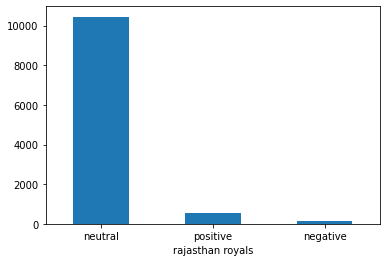

In [ ]:
dfRR = df[df["teams"] == 'rajasthan royals']
dfRR['sentiment_score'] = dfRR['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfRR['sentiment'] = dfRR['sentiment_score'].apply(sentiment_func)
dfRR.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('rajasthan royals')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'delhi capital')

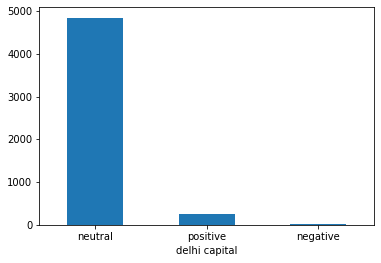

In [ ]:
dfDC = df[df["teams"] == 'delhi capital']
dfDC['sentiment_score'] = dfDC['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfDC['sentiment'] = dfDC['sentiment_score'].apply(sentiment_func)
dfDC.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('delhi capital')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'kolkata knight riders')

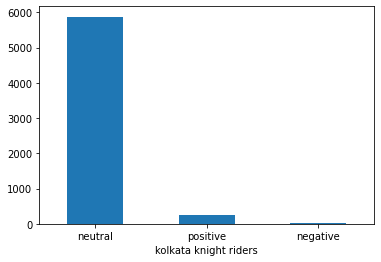

In [ ]:
dfKKR = df[df["teams"] == 'kolkata knight riders']
dfKKR['sentiment_score'] = dfKKR['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfKKR['sentiment'] = dfKKR['sentiment_score'].apply(sentiment_func)
dfKKR.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('kolkata knight riders')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'mumbai indians')

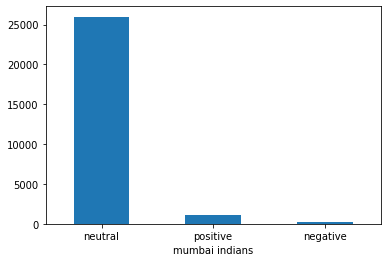

In [ ]:
dfMI = df[df["teams"] == 'mumbai indians']
dfMI['sentiment_score'] = dfMI['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfMI['sentiment'] = dfMI['sentiment_score'].apply(sentiment_func)
dfMI.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('mumbai indians')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'chennai super kings')

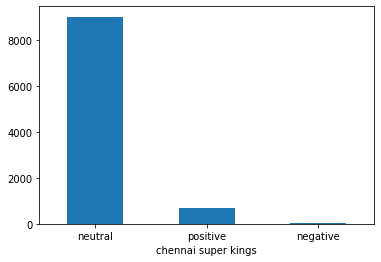

In [ ]:
dfCSK = df[df["teams"] == 'chennai super kings']
dfCSK['sentiment_score'] = dfCSK['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfCSK['sentiment'] = dfCSK['sentiment_score'].apply(sentiment_func)
dfCSK.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('chennai super kings')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'royal challengers bangalore')

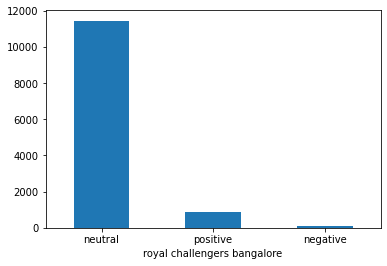

In [ ]:
dfRCB = df[df["teams"] == 'royal challengers bangalore']
dfRCB['sentiment_score'] = dfRCB['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfRCB['sentiment'] = dfRCB['sentiment_score'].apply(sentiment_func)
dfRCB.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('royal challengers bangalore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'sunrisers hyderabad')

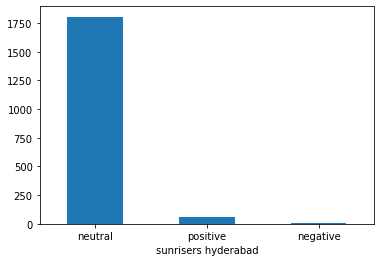

In [ ]:
dfSRH = df[df["teams"] == 'sunrisers hyderabad']
dfSRH['sentiment_score'] = dfSRH['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfSRH['sentiment'] = dfSRH['sentiment_score'].apply(sentiment_func)
dfSRH.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('sunrisers hyderabad')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0, 'kings xi punjab')

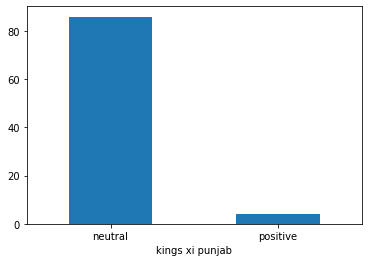

In [ ]:
dfKXIP = df[df["teams"] == 'kings xi punjab']
dfKXIP['sentiment_score'] = dfKXIP['text'].apply(lambda x: analyser.polarity_scores(str(x)))
dfKXIP['sentiment'] = dfKXIP['sentiment_score'].apply(sentiment_func)
dfKXIP.sentiment.value_counts().plot(kind='bar', rot=0)
plt.xlabel('kings xi punjab')

**Final Outcome**

The bar graphs plotted above shows us the sentiments of user tweets as per every individual team. Following are the insights:

1.	We can see that all the teams have neutral tweets the most, the reason behind this could be as stated in the previous feature that many tweets contain just the score updates and hence it is neutral. 

2.	It is followed by positive tweets and then negative tweets. We barely see any negative tweets for every team. Thus, the point made in the previous feature is correct that, “the COVID-19 cases were increasing drastically in India and the government was not stopping the IPL and gave more preference to it, which made users agitated and tweet negative about IPL in general and not teams.

# Determine most marketable player in every team.

In [ ]:
import re
import pandas as pd
ipl = pd.read_csv('/content/IPL_2021_tweets.csv', lineterminator='\n')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:

def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

In [ ]:
ipl['refine_text']=ipl['text'].str.lower()
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_tag(str(x)))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_mention(str(x)))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_hash(str(x)))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_newline(x))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_url(x))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_number(x))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_punct(x))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:remove_thi_amp_ha_words(x))
ipl['refine_text']=ipl['refine_text'].apply(lambda x:text_strip(x))

ipl['text_length']=ipl['refine_text'].str.split().map(lambda x: len(x))

In [ ]:
ipl.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'refine_text',
       'text_length'],
      dtype='object')

In [ ]:
teams = ["chennai super kings", "csk",
"royal challengers bangalore", "rcb",
"delhi capital", "dc",
"mumbai indians", "mi",
"kolkata knight riders", "kkr",
"rajasthan royals", "rr",
"kings xi punjab", "kxip",
"sunrisers hyderabad", "srh"]

In [ ]:
def returnTweet(text, item1, item2):
    if (item1 in text) or (item2 in text):
        return text
    else:
        return ""

In [ ]:
ipl["csk"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"chennai super kings", "csk" ))
ipl["rcb"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"royal challengers bangalore", "rcb" ))
ipl["dc"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"delhi capital", "dc" ))
ipl["mi"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"mumbai indians", "mi" ))
ipl["kkr"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"kolkata knight riders", "kkr" ))
ipl["rr"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"rajasthan royals", "rr" ))
ipl["kxip"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"kings xi punjab", "kxip" ))
ipl["srh"] = ipl.refine_text.apply(lambda x: returnTweet(str(x),"sunrisers hyderabad", "srh" ))

In [ ]:
csk_tweets = ipl["csk"].sum()
rcb_tweets = ipl["rcb"].sum()
dc_tweets = ipl["dc"].sum()
mi_tweets = ipl["mi"].sum()
kkr_tweets = ipl["kkr"].sum()
rr_tweets = ipl["rr"].sum()
kxip_tweets = ipl["kxip"].sum()
srh_tweets = ipl["srh"].sum()

In [ ]:
customList = ['chennai super kings','csk', "vs", "dc", "mi", "fan", "playing", "win", "chennai", "super", "king", "kings", "ipl", "rcb",
             "team", "will", "match", "wicket", "fans", "today","won", "run","rr", "runs", "matches", "seasons","game", "teams", "join","player","toss",
             "need", "wickets", "now", "one", "batting", "mumbai", "indian","indians","captain","overs","first","players","th","time","play","lost","beat","bat","season","csks",
             "top","year","take", "last","rajasthan" ,"royal","royals","see","back","st","S","V","ball","day","prediction","playoff","come","start",
             "delhi", "capital", "t","challengers","bangalore","winning","rcbs","playoffs","bowler","good"]

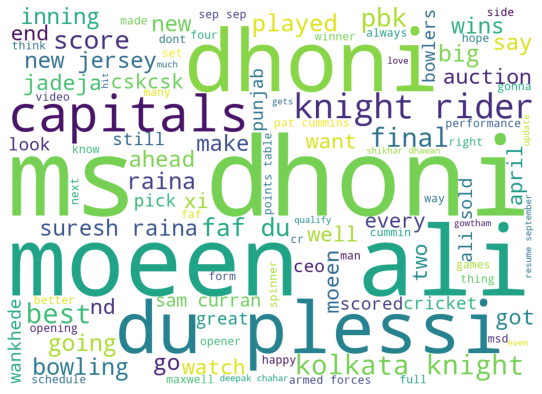

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(csk_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:-**

The most talked about players include

1) MS Dhone

2) Suresh Raina

3) Sam Curran

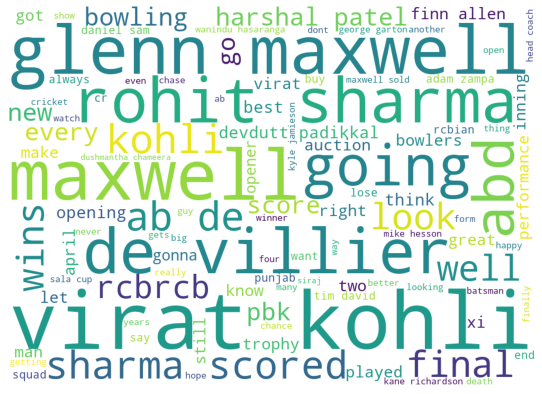

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(rcb_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) Virat Kohli

2) Ab De Villiers

3) Devdutt Padikkal

KL Rahul was observed to be popular among tweets related to Royal Challengers Bangalore

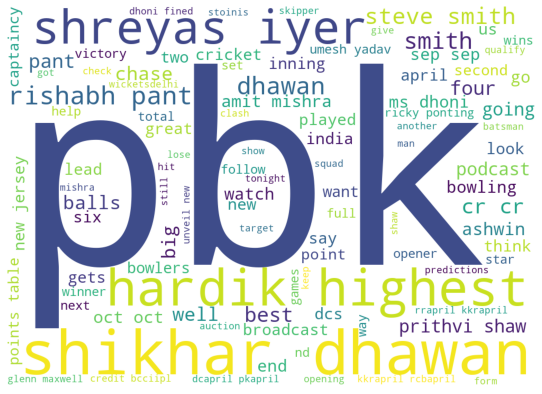

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

dcList = ["capitals", "qualifer","dream", "sunrisers","hyderabad","final","dream","qualifier","bowl","score","finals","preview","xi","punjab",
         "live","make","update"]
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(dc_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) Shikar Dhawan

2) Shreyas Iyer

3) Marcus Stoinis

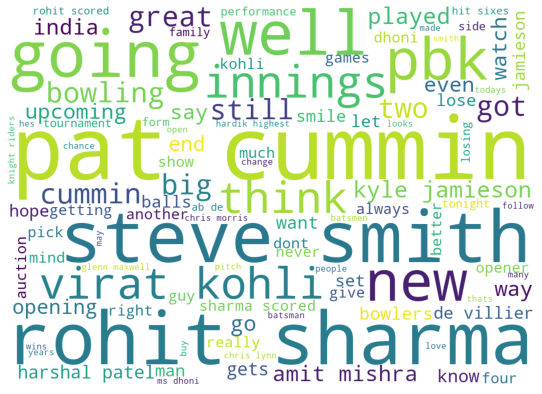

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

miList = ["might","coming", "miss","middle","premier","league","missed","order","best","cricket","missing","inning","look"]
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList + miList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(mi_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) Steve Smith

2) Rohit SHarma

3) Mohammed Shami

MS Dhoni was observed to be popular among tweets related to Rajasthan Royals 

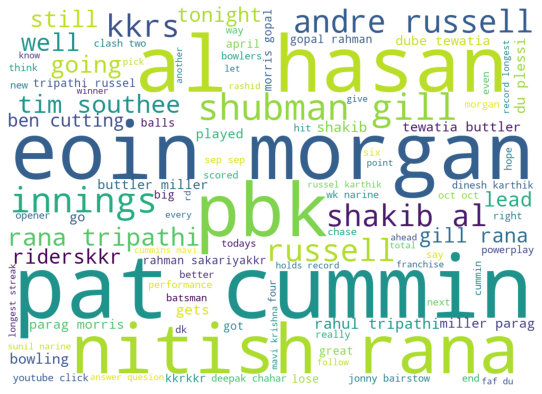

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

kkrList = ["knight", "rider","kolkata","riders","kkr"]
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList + miList + kkrList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(kkr_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) Eoin Morgan

2) Dinesh Karthik

3) Shubman Gill

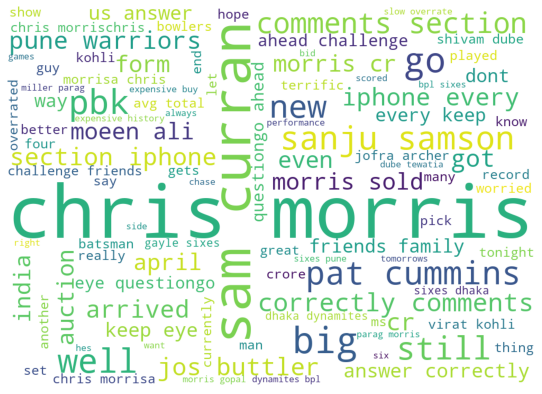

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

rrList = ["tomorrow","current","sorry","innings","dhoni","balls","going","bowling","watch","underrated","watch","two","think","nrr","next"]
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList + miList + kkrList + rrList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(rr_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) Chris Morris

2) Steve Smith 

3) Ben Stokes

Sam curan, Steve Smith, Virat Kohli was observed to be popular among tweets related to Rajasthan Royals 

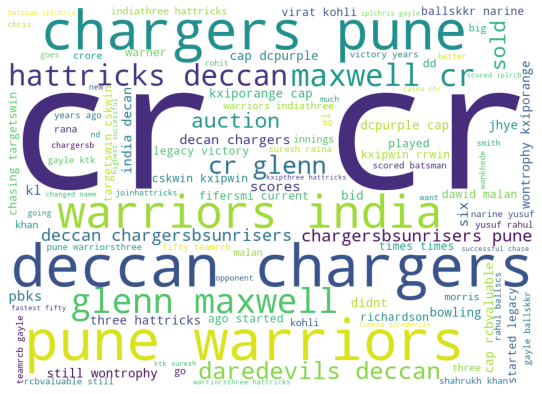

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

kxipList = ["balls","wins","Todays","sep","two","watch","oct"]
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList + miList + kkrList + kxipList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(kxip_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference**

The most talked about players include

2) KL Rahul

2) Chris Gayle

3) Mayank Agarwal

Virat Kohli was observed to be popular among tweets related to Kings ix Punjab 

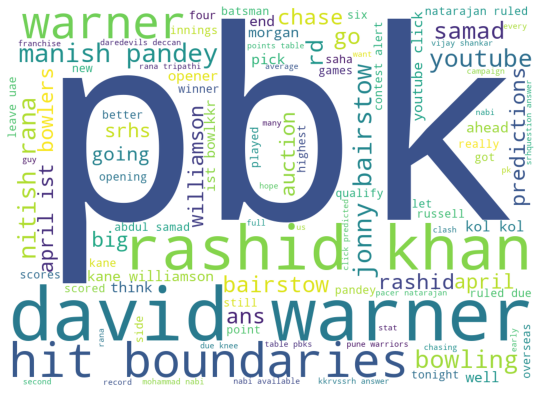

In [ ]:
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

srhList = []
# Creating the custom stopwords
customStopwords=list(STOPWORDS) + customList + teams + dcList + miList + kkrList + kxipList+ srhList
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(srh_tweets)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

**Inference:**

The most talked about players include

1) David Warner

2) Kane Williamson

3) Manish Pandey 

**Final Outcome**

From the above word clouds generated from each team, it can be observed that,

1.	MS Dhoni

2.	Virat Kohli

3.	KL Rahul

were not only popular among their team but were also talked about on tweets of other teams hinting their market value. This can be justified as Virat Kohli and MS Dhoni were also the highest paid IPL athletes for the year 2021
